# Analysis of the deformation in linescan measurements by image registration

#To do : 

- Extract deformation of vessels and endfoot from the different channels
- Compare with traces
- Extract ridig motion layer 2 form the interfaces
- Extract rigid motion form traces
- peak to peak analysis rigid motion
- peak to peak analysis deformation
- comparison artifact rigid motion
- comparison PVS1 PVS2


## Import libraries

In [5]:
import pandas as pd

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

from ipywidgets import interact, fixed
from IPython.display import clear_output

import numpy as np

In [7]:
import SimpleITK as sitk
print(sitk.Version())

image_viewer = sitk.ImageViewer()
image_viewer.SetCommand('/home/alexandra/Slicer-4.11.20210226-linux-amd64/Slicer')

SimpleITK Version: 2.0.0rc2 (ITK 5.1)
Compiled: Jun 30 2020 13:57:21



In [8]:
import sys
sys.path.append("../") # go to parent dir
from src.datanalysis import lowpassfilter, highpassfilter

In [9]:
from scipy.signal import savgol_filter

## Import data

In [6]:
Files={}

Files['WT06']={}

Files['WT06']['name']='WT-06-11-047'
Files['WT06']['tini']=420
Files['WT06']['traces']='/home/alexandra/Documents/Data/Laura/Linescans/270122_4traces/PenetratingArterioles/WT 06 20201008 11 Penetrating Arteriole 047.csv'
Files['WT06']['info']='/home/alexandra/Documents/Data/Laura/Linescans/raw_images/WT 06 20201008 11 info.csv'
Files['WT06']['red']='/home/alexandra/Documents/Data/Laura/Linescans/raw_images/WT 06 20201008 11 lumen.tif'
Files['WT06']['green']='/home/alexandra/Documents/Data/Laura/Linescans/raw_images/WT 06 20201008 11 endfoot.tif'

In [7]:
# bad correlation lumen
Files={}
Files['WT08']={}
Files['WT08']['tini']=120
Files['WT08']['name']='WT-08-03-064'
Files['WT08']['traces']='/home/alexandra/Documents/Data/Laura/Linescans/270122_4traces/PenetratingArterioles/WT 08 20210309 03 Penetrating Arteriole 064.csv'
Files['WT08']['info']='/home/alexandra/Documents/Data/Laura/Linescans/raw_images/WT 08 20210309 03 Penetrating Arteriole 064 info.csv'
Files['WT08']['red']='/home/alexandra/Documents/Data/Laura/Linescans/raw_images/WT 08 20210309 03 Penetrating Arteriole 064 lumen.tif'
Files['WT08']['green']='/home/alexandra/Documents/Data/Laura/Linescans/raw_images/WT 08 20210309 03 Penetrating Arteriole 064 endfoot.tif'

In [8]:
#high amplitude VLF lumen
Files={}
Files['WT10']={}
Files['WT10']['tini']=462
Files['WT10']['name']='WT-10-05-105'
Files['WT10']['traces']='/home/alexandra/Documents/Data/Laura/Linescans/270122_4traces/PenetratingArterioles/WT 10 20210422 05 Penetrating Arteriole 105.csv'
Files['WT10']['info']='/home/alexandra/Documents/Data/Laura/Linescans/raw_images/WT 10 20210422 05 Penetrating Arteriole 105 info.csv'
Files['WT10']['red']='/home/alexandra/Documents/Data/Laura/Linescans/raw_images/WT 10 20210422 05 Penetrating Arteriole 105 lumen.tif'
Files['WT10']['green']='/home/alexandra/Documents/Data/Laura/Linescans/raw_images/WT 10 20210422 05 Penetrating Arteriole 105 endfoot.tif'

In [9]:
# high amplitude PVS
Files={}
Files['WT06']={}
Files['WT06']['name']='WT-06-09-045'
Files['WT06']['tini']=163
Files['WT06']['traces']='/home/alexandra/Documents/Data/Laura/Linescans/270122_4traces/PenetratingArterioles/WT 06 20201008 09 Penetrating Arteriole 045.csv'
Files['WT06']['info']='/home/alexandra/Documents/Data/Laura/Linescans/raw_images/WT 06 20201008 09 Penetrating Arteriole 045 info.csv'
Files['WT06']['red']='/home/alexandra/Documents/Data/Laura/Linescans/raw_images/WT 06 20201008 09 Penetrating Arteriole 045 lumen.tif'
Files['WT06']['green']='/home/alexandra/Documents/Data/Laura/Linescans/raw_images/WT 06 20201008 09 Penetrating Arteriole 045 endfoot.tif'

Files['WT09']={}
Files['WT09']['name']='WT-09-04-074'

In [10]:
Files={}

Files['WT06']={}
Files['WT09']={}
Files['WT10']={}

Files['WT06']['name']='WT-06-09-045'
Files['WT09']['name']='WT-09-03-073'
Files['WT10']['name']='WT-10-07-093'

Files['WT06']['traces']='/home/alexandra/Documents/Data/Laura/Linescans/270122_4traces/PenetratingArterioles/WT 06 20201008 09 Penetrating Arteriole 045.csv'
Files['WT09']['traces']='/home/alexandra/Documents/Data/Laura/Linescans/270122_4traces/PenetratingArterioles/WT 09 20210308 03 Penetrating Arteriole 073.csv'
Files['WT10']['traces']='/home/alexandra/Documents/Data/Laura/Linescans/270122_4traces/PenetratingArterioles/WT 10 20210226 07 Penetrating Arteriole 093.csv'

Files['WT06']['info']='/home/alexandra/Documents/Data/Laura/Linescans/raw_images/WT 06 20201008 09 Penetrating Arteriole 045 info.csv'
Files['WT09']['info']='/home/alexandra/Documents/Data/Laura/Linescans/raw_images/WT 09 20210308 03 Penetrating Arteriole 073 info.csv'
Files['WT10']['info']='/home/alexandra/Documents/Data/Laura/Linescans/raw_images/WT 10 20210226 07 Penetrating Arteriole 093 info.csv'

Files['WT06']['red']='/home/alexandra/Documents/Data/Laura/Linescans/raw_images/WT 06 20201008 09 Penetrating Arteriole 045 lumen.tif'
Files['WT09']['red']='/home/alexandra/Documents/Data/Laura/Linescans/raw_images/WT 09 20210308 03 Penetrating Arteriole 073 lumen.tif'
Files['WT10']['red']='/home/alexandra/Documents/Data/Laura/Linescans/raw_images/WT 10 20210226 07 Penetrating Arteriole 093 lumen.tif'

Files['WT06']['green']='/home/alexandra/Documents/Data/Laura/Linescans/raw_images/WT 06 20201008 09 Penetrating Arteriole 045 endfoot.tif'
Files['WT09']['green']='/home/alexandra/Documents/Data/Laura/Linescans/raw_images/WT 09 20210308 03 Penetrating Arteriole 073 endfoot.tif'
Files['WT10']['green']='/home/alexandra/Documents/Data/Laura/Linescans/raw_images/WT 10 20210226 07 Penetrating Arteriole 093 endfoot.tif'

In [121]:
# small radius of lumen
Files={}

Files['WT06']={}

Files['WT06']['name']='WT-06-10-066'
Files['WT06']['tini']=87
Files['WT06']['traces']='/home/alexandra/Documents/Data/Laura/Linescans/270122_4traces/PenetratingArterioles/WT 08 20210311 10 Penetrating Arteriole 066.csv'
Files['WT06']['info']='/home/alexandra/Documents/Data/Laura/Linescans/raw_images/WT 08 20210311 10 Penetrating Arteriole 066 info.csv'
Files['WT06']['red']='/home/alexandra/Documents/Data/Laura/Linescans/raw_images/WT 08 20210311 10 Penetrating Arteriole 066 lumen.tif'
Files['WT06']['green']='/home/alexandra/Documents/Data/Laura/Linescans/raw_images/WT 08 20210311 10 Penetrating Arteriole 066 endfoot.tif'

Files['WT10']={}
Files['WT10']['tini']=203
Files['WT10']['name']='WT-10-05-105'
Files['WT10']['traces']='/home/alexandra/Documents/Data/Laura/Linescans/270122_4traces/PenetratingArterioles/WT 10 20210422 05 Penetrating Arteriole 105.csv'
Files['WT10']['info']='/home/alexandra/Documents/Data/Laura/Linescans/raw_images/WT 10 20210422 05 Penetrating Arteriole 105 info.csv'
Files['WT10']['red']='/home/alexandra/Documents/Data/Laura/Linescans/raw_images/WT 10 20210422 05 Penetrating Arteriole 105 lumen.tif'
Files['WT10']['green']='/home/alexandra/Documents/Data/Laura/Linescans/raw_images/WT 10 20210422 05 Penetrating Arteriole 105 endfoot.tif'


Files['WT08']={}

Files['WT08']['name']='WT-08-03-064'
Files['WT08']['traces']='/home/alexandra/Documents/Data/Laura/Linescans/270122_4traces/PenetratingArterioles/WT 08 20210309 03 Penetrating Arteriole 064.csv'
Files['WT08']['info']='/home/alexandra/Documents/Data/Laura/Linescans/raw_images/WT 08 20210309 03 Penetrating Arteriole 064 info.csv'
Files['WT08']['red']='/home/alexandra/Documents/Data/Laura/Linescans/raw_images/WT 08 20210309 03 Penetrating Arteriole 064 lumen.tif'
Files['WT08']['green']='/home/alexandra/Documents/Data/Laura/Linescans/raw_images/WT 08 20210309 03 Penetrating Arteriole 064 endfoot.tif'


Files['WT081066']={}

Files['WT081066']['name']='WT-08-10-066'
Files['WT081066']['traces']='/home/alexandra/Documents/Data/Laura/Linescans/270122_4traces/PenetratingArterioles/WT 08 20210311 10 Penetrating Arteriole 066.csv'
Files['WT081066']['info']='/home/alexandra/Documents/Data/Laura/Linescans/raw_images/WT 08 20210311 10 Penetrating Arteriole 066 info.csv'
Files['WT081066']['red']='/home/alexandra/Documents/Data/Laura/Linescans/raw_images/WT 08 20210311 10 Penetrating Arteriole 066 lumen.tif'
Files['WT081066']['green']='/home/alexandra/Documents/Data/Laura/Linescans/raw_images/WT 08 20210311 10 Penetrating Arteriole 066 endfoot.tif'

In [ ]:
# large PVS endfoot
Files={}
Files['WT060500']={}

Files['WT081066']['name']='WT-08-10-066'
Files['WT081066']['traces']='/home/alexandra/Documents/Data/Laura/Linescans/270122_4traces/PenetratingArterioles/WT 08 20210311 10 Penetrating Arteriole 066.csv'
Files['WT081066']['info']='/home/alexandra/Documents/Data/Laura/Linescans/raw_images/WT 08 20210311 10 Penetrating Arteriole 066 info.csv'
Files['WT081066']['red']='/home/alexandra/Documents/Data/Laura/Linescans/raw_images/WT 08 20210311 10 Penetrating Arteriole 066 lumen.tif'
Files['WT081066']['green']='/home/alexandra/Documents/Data/Laura/Linescans/raw_images/WT 08 20210311 10 Penetrating Arteriole 066 endfoot.tif'

# Analysis

In [134]:
mouse='WT10'
# initial time and time window
#tini=Files[mouse]['tini'] #sec
tini=200
#tini=820
#09 04  t  480
timewindow=10 #sec

outputfolder='output/'+mouse+'/'+str(int(tini))+'/'

import os
if not os.path.exists(outputfolder):
    os.makedirs(outputfolder)

In [135]:
# previoulsy analysed peak to peak 

peaktopeakPVS1=pd.read_pickle('/home/alexandra/Documents/Python/linescan-analysis/output/databases/PenetratingArteriolesWT6/PenetratingArteriolesWT6_'+Files[mouse]['name']+'-PVS1.pkl')
peaktopeakPVS2=pd.read_pickle('/home/alexandra/Documents/Python/linescan-analysis/output/databases/PenetratingArteriolesWT6/PenetratingArteriolesWT6_'+Files[mouse]['name']+'-PVS2.pkl')
peaktopeakLumen=pd.read_pickle('/home/alexandra/Documents/Python/linescan-analysis/output/databases/PenetratingArteriolesWT6/PenetratingArteriolesWT6_'+Files[mouse]['name']+'-lumen.pkl')

FileNotFoundError: [Errno 2] No such file or directory: '/home/alexandra/Documents/Python/linescan-analysis/output/databases/PenetratingArteriolesWT6/PenetratingArteriolesWT6_WT-10-05-105-PVS1.pkl'

In [136]:
# previously analysed interface location 
data=pd.read_csv(Files[mouse]['traces'], decimal='.', delimiter=",")

In [137]:
# raw data
tiffgreen = sitk.ReadImage(Files[mouse]['green'])
tiffred = sitk.ReadImage(Files[mouse]['red'])

Arraygreen=sitk.GetArrayFromImage(tiffgreen)
Arrayred=sitk.GetArrayFromImage(tiffred)

In [138]:
Files[mouse]['green']

'/home/alexandra/Documents/Data/Laura/Linescans/raw_images/WT 10 20210422 05 Penetrating Arteriole 105 endfoot.tif'

In [139]:
Arraygreen.shape

(394, 100333)

In [140]:
info=pd.read_csv(Files[mouse]['info'], decimal='.', delimiter=",")

fs=info['vessel_fs'].values[0]
ts=1/fs
dx=info['vessel_dx'].values[0]

In [141]:
#number of pixels
Nx=len(Arrayred[:,0])

In [142]:
# time vector
spantime=np.arange(len(data))*ts

In [143]:
tini_index=np.where(spantime>=tini)[0][0]
Ntime=round(timewindow*fs)
tend_index=tini_index+Ntime

In [144]:
initialtraces={}

initialtraces['endfoot_bottom']=data['endfoot_lower'][tini_index:tend_index]
initialtraces['lumen_bottom']=data['lumen_lower'][tini_index:tend_index]
initialtraces['endfoot_top']=data['endfoot_upper'][tini_index:tend_index]
initialtraces['lumen_top']=data['lumen_upper'][tini_index:tend_index]

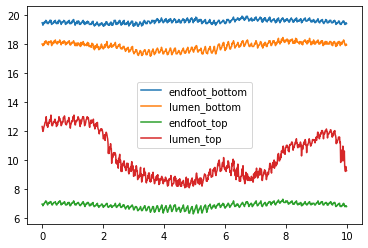

In [145]:
for label in initialtraces :
    plt.plot(np.arange(Ntime)*ts,np.array(initialtraces[label]),label=label)
    
plt.legend()

## Define useful functions for registration analysis

In [146]:
sitk.ProcessObject.SetGlobalWarningDisplay(False)

In [147]:
import registration_callbacks

In [148]:
def myshow(img, title=None, margin=0.05, dpi=80):
    nda =  sitk.GetArrayFromImage(img)

    ysize = nda.shape[0]
    xsize = nda.shape[1]
      
   # figsize = (1 + margin) * ysize / dpi, (1 + margin) * xsize / dpi

    fig = plt.figure(title) #, figsize=figsize, dpi=dpi)
    #ax = fig.add_axes()
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])
    #extent = (0, xsize*spacing[1], 0, ysize*spacing[0])
    
    t = ax.imshow(nda,
            #extent=extent,
            interpolation='hamming',
            cmap='gray',
            origin='lower',
            aspect=2)
    
    if(title):
        plt.title(title)

In [149]:
def resample(image, transform):
    # Output image Origin, Spacing, Size, Direction are taken from the reference
    # image in this call to Resample
    reference_image = image
    interpolator = sitk.sitkCosineWindowedSinc
    default_value = 100.0
    return sitk.Resample(image, reference_image, transform,
                         interpolator, default_value)

In [150]:
def get_deformation(image, transform):
    x, y = image.GetSize()
    X, Y = np.meshgrid(np.arange(0, x, 1), np.arange(0, y, 1))
    
    U = np.zeros(X.shape)
    V = np.zeros(Y.shape)
    for index, value in np.ndenumerate(X):
        px, py = transform.TransformPoint((float(value), float(Y[index])))
        U[index] = px - value
        V[index] = py - Y[index]
    
    return U,V

## Visualise the two channels

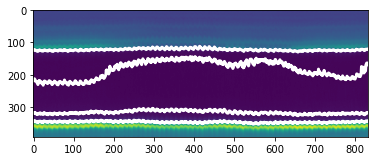

In [151]:
image2Dgreen=np.array(Arraygreen[:,tini_index:tend_index])
plt.imshow(image2Dgreen,aspect=0.8)

for label in initialtraces :
    plt.plot(np.arange(Ntime),np.array(initialtraces[label])/dx,label=label,linewidth=3,c='w')

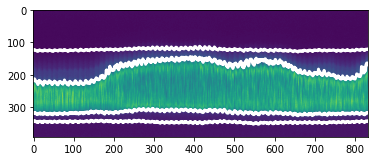

In [152]:
image2Dred=np.array(Arrayred[:,tini_index:tend_index])
plt.imshow(image2Dred,aspect=0.8)

for label in initialtraces :
    plt.plot(np.arange(Ntime),np.array(initialtraces[label])/dx,label=label,linewidth=3,c='w')

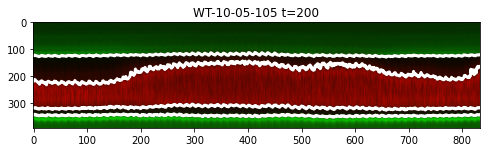

In [153]:
image2DRGB=np.zeros((np.size(image2Dgreen,0),np.size(image2Dgreen,1),3),'uint8')
image2DRGB[...,0]=image2Dred/image2Dred.max()*256
image2DRGB[...,1]=image2Dgreen/image2Dgreen.max()*256
image2DRGB=image2DRGB.astype('float32')
plt.figure(figsize=(8,8))
plt.imshow(image2DRGB/300,aspect=0.5)

for label in initialtraces :
    plt.plot(np.arange(Ntime),np.array(initialtraces[label])/dx,label=label,linewidth=3,c='w')

plt.title(Files[mouse]['name']+' t='+str(tini))
plt.savefig(outputfolder+'thresholding_traces.png')

In [154]:
# Localisation of the markers in the initial frame
deltax=5
shift=2

ranges={}
upper={}
lower={}

upper['endfoot_bottom']=shift+30
lower['endfoot_bottom']=shift

upper['endfoot_top']=0
lower['endfoot_top']=-30

upper['lumen_bottom']=shift+20
lower['lumen_bottom']=shift

upper['lumen_top']=0
lower['lumen_top']=-20

for label in initialtraces :
    ranges[label]=range(round(np.array(initialtraces[label])[0]/dx)+lower[label],round(np.array(initialtraces[label])[0]/dx)+upper[label])


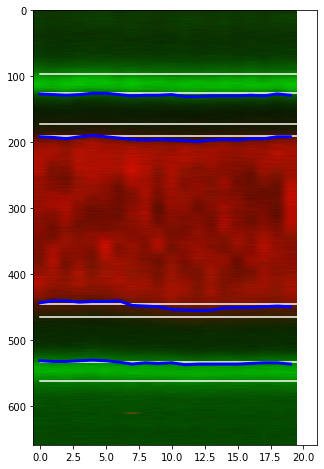

In [107]:
plt.figure(figsize=(8,8))
plt.imshow(image2DRGB[:,0:20]/300,aspect=0.05)

for label in ranges :
    plt.plot([0,20],[np.array(ranges[label])[0],np.array(ranges[label])[0]],'w')
    plt.plot([0,20],[np.array(ranges[label])[-1],np.array(ranges[label])[-1]],'w')

for label in initialtraces :
    plt.plot(np.arange(20),np.array(initialtraces[label][0:20])/dx,label=label,linewidth=3,c='b')
    


# Rigid transformation

In [108]:
channels={}

channels['red']={}
channels['green']={}
channels['mixed']={}

channels['red']['name']='red'
channels['red']['alpha']=0


channels['green']['name']='green'
channels['green']['alpha']=1

channels['mixed']['name']='mixed'
channels['mixed']['alpha']=0.6

In [109]:
def rigid_transform(fixedimage,movingimage) :
    R = sitk.ImageRegistrationMethod()

    R.SetOptimizerWeights([0,0,1,1])

    # This is more robust if intensities change
    R.SetMetricAsCorrelation()

    # I tryed several parameters here, it is robust
    R.SetOptimizerAsRegularStepGradientDescent(learningRate=2.0,
                                               minStep=1e-2,
                                               numberOfIterations=100,
                                               gradientMagnitudeTolerance=1e-4)
    R.SetOptimizerScalesFromIndexShift()


    tx = sitk.CenteredTransformInitializer(fixedimage, movingimage,sitk.Similarity2DTransform())

    R.SetInitialTransform(tx)

    R.SetInterpolator(sitk.sitkLinear)

    #R.AddCommand(sitk.sitkIterationEvent, lambda: command_iteration(R))

    return  R.Execute(fixedimage, movingimage)

In [110]:
spantranslation={}
correctedtranslation={}
inputimage={}

windowsize=5

for channel in channels:
    # Let's try a loop over the N first frames
    nrows=4
    # pourcentage of green channel
    alpha=channels[channel]['alpha']


    inputimage[channel]=np.zeros([Nx,Ntime])
    correctedtranslation[channel]=np.zeros([Nx,Ntime])


    # template from first image
    image2Dgreen=np.array([Arraygreen[:,tini_index] for line in range(0,nrows)]).astype('float32')
    image2Dred=np.array([Arrayred[:,tini_index] for line in range(0,nrows)]).astype('float32')
    fixedimage= sitk.GetImageFromArray(alpha*image2Dgreen+(1-alpha)*image2Dred)

    correctedtranslation[channel][:,0]=sitk.GetArrayFromImage(fixedimage)[0,:]

    #create a translation object
    translation = sitk.TranslationTransform(2)

    #initialise offset
    yoffset=0

    spantranslation[channel]=[]

    for i in range(0,Ntime) :
        image2Dgreen=np.array([Arraygreen[:,tini_index+i] for line in range(0,nrows)]).astype('float32')
        image2Dred=np.array([Arrayred[:,tini_index+i] for line in range(0,nrows)]).astype('float32') 
        movingimage=sitk.GetImageFromArray(alpha*image2Dgreen+(1-alpha)*image2Dred)

        outTx = rigid_transform(fixedimage, movingimage)
        yoffset=outTx.GetParameters()[2]

        spantranslation[channel].append(yoffset)

        translation.SetParameters((yoffset,0))

        resampled = resample(movingimage, translation)

        inputimage[channel][:,i]=sitk.GetArrayFromImage(movingimage)[0,:]
        correctedtranslation[channel][:,i]=sitk.GetArrayFromImage(resampled)[0,:]

        #fixedimage=resampled  
        
        #templateimage=correctedtranslation[channel][:,0:min(windowsize,i)].mean(axis=1).astype('float32')
        #image2Dtemplate=np.array([templateimage for line in range(0,nrows)]).astype('float32')

        #fixedimage=sitk.GetImageFromArray(image2Dtemplate)

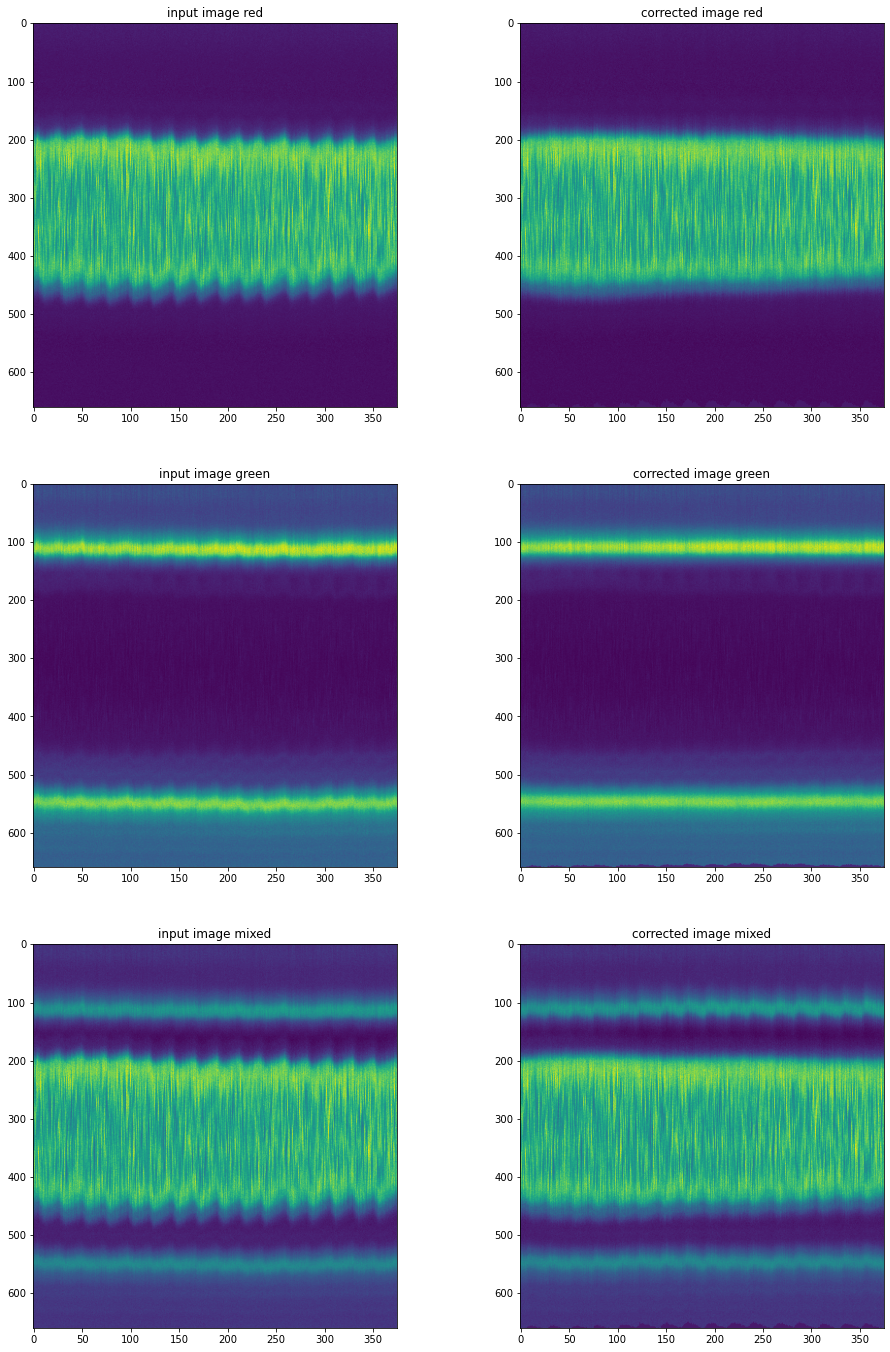

In [111]:
plt.figure(figsize=(16,8*3))

for j,channel in enumerate(channels) :
    
    ax1=plt.subplot(3,2,1+j*2)
    ax2=plt.subplot(3,2,2+j*2)
    ax1.imshow(inputimage[channel],aspect=0.6)
    ax1.set_title('input image '+channel)
    ax2.imshow(correctedtranslation[channel],aspect=0.6)
    ax2.set_title('corrected image '+channel)
    
plt.savefig(outputfolder+'translation_correction.png')

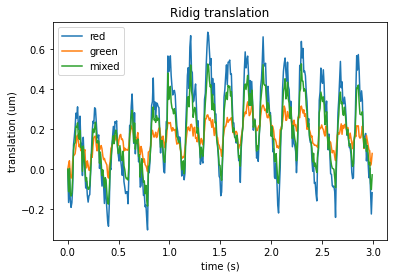

In [112]:
for channel in spantranslation :
    plt.plot(np.arange(Ntime)*ts,np.array(spantranslation[channel])*dx,label=channel)

plt.title('Ridig translation')
plt.xlabel('time (s)')
plt.ylabel('translation (um)')
plt.legend()

plt.savefig(outputfolder+'rigid motion.png')

In [113]:
import src.datanalysis as da

signal=np.array(spantranslation['mixed'])*dx
signal_filtered=savgol_filter(signal,11,3)
signal_filtered=highpassfilter(signal_filtered,fs,5)
ampl,period,tvalley,tpeak,mean=da.amp_analysis(signal,signal_filtered,np.arange(Ntime)*ts,5, 15, view=False)

In [114]:
# Lets do a bit of trigo to estimate the possible wall movement artefact due to motion
rigidmotion=np.mean(ampl) #um
vesselradius=(initialtraces['lumen_bottom']-initialtraces['lumen_top']).mean()/2 # um when contracted
endfootradius=(initialtraces['endfoot_bottom']-initialtraces['endfoot_top']).mean()/2 # um when contracted

tobeprinted_rigid=[]

print('Cardiac rigid motion = %e'%rigidmotion)
print('Mean vessel radius = %e'%vesselradius)

tobeprinted_rigid.append(rigidmotion)
tobeprinted_rigid.append(vesselradius)

theta=np.arcsin(rigidmotion/vesselradius)
cardiacartefact=vesselradius*(1-np.cos(theta))
print('cardiac lumen artifact to be expected (radius): %.2f um'%cardiacartefact)


theta=np.arcsin(rigidmotion/endfootradius)
endfootartefact=endfootradius*(1-np.cos(theta))
print('cardiac endfoot artifact to be expected (radius): %.2f um'%endfootartefact)



pvsartefact=cardiacartefact-endfootartefact
print('cardiac PVS artifact to be expected (radius): %.2f um'%pvsartefact)
print('cardiac PVS artifact to be expected (pc): %.2f um'%(pvsartefact/(endfootradius-vesselradius)))


tobeprinted_rigid.append(cardiacartefact)
tobeprinted_rigid.append(endfootartefact)
tobeprinted_rigid.append(pvsartefact)
tobeprinted_rigid.append(pvsartefact/(endfootradius-vesselradius))

#########333


rigidmotion=np.max(spantranslation['mixed'])*dx-np.min(spantranslation['mixed'])*dx #um
vesselradius=(initialtraces['lumen_bottom']-initialtraces['lumen_top']).max()/2 # um



print('\nSlow waves')

print('Max rigid motion = %e'%rigidmotion)
print('Max vessel radius = %e'%vesselradius)


tobeprinted_rigid.append(rigidmotion)
tobeprinted_rigid.append(vesselradius)


theta=np.arcsin(rigidmotion/vesselradius)
cardiacartefact=vesselradius*(1-np.cos(theta))
print('VLF lumen artifact to be expected (radius): %.2f um'%cardiacartefact)

theta=np.arcsin(rigidmotion/endfootradius)
endfootartefact=endfootradius*(1-np.cos(theta))
print('VLF endfoot artifact to be expected (radius): %.2f um'%endfootartefact)

pvsartefact=cardiacartefact-endfootartefact
print('VLF PVS artifact to be expected (radius): %.2f um'%pvsartefact)
print('VLF PVS artifact to be expected (pc): %.2f um'%(pvsartefact/(endfootradius-vesselradius)))


tobeprinted_rigid.append(cardiacartefact)
tobeprinted_rigid.append(endfootartefact)
tobeprinted_rigid.append(pvsartefact)
tobeprinted_rigid.append(pvsartefact/(endfootradius-vesselradius))


Cardiac rigid motion = 2.513022e-01
Mean vessel radius = 6.140662e+00
cardiac lumen artifact to be expected (radius): 0.01 um
cardiac endfoot artifact to be expected (radius): 0.00 um
cardiac PVS artifact to be expected (radius): 0.00 um
cardiac PVS artifact to be expected (pc): 0.00 um

Slow waves
Max rigid motion = 7.079161e-01
Max vessel radius = 6.492074e+00
VLF lumen artifact to be expected (radius): 0.04 um
VLF endfoot artifact to be expected (radius): 0.03 um
VLF PVS artifact to be expected (radius): 0.01 um
VLF PVS artifact to be expected (pc): 0.00 um


# Non-rigid deformation

In [115]:
margin=20
correctedtranslationcrop={}
for channel in channels :
    correctedtranslationcrop[channel]=correctedtranslation[channel][margin:-margin,:]

In [116]:
np.shape(correctedtranslationcrop[channel])

(620, 375)

In [117]:
def smooth_and_resample(image, shrink_factors, smoothing_sigmas):
    """
    Args:
        image: The image we want to resample.
        shrink_factor(s): Number(s) greater than one, such that the new image's size is original_size/shrink_factor.
        smoothing_sigma(s): Sigma(s) for Gaussian smoothing, this is in physical units, not pixels.
    Return:
        Image which is a result of smoothing the input and then resampling it using the given sigma(s) and shrink factor(s).
    """
    if np.isscalar(shrink_factors):
        shrink_factors = [shrink_factors]*image.GetDimension()
    if np.isscalar(smoothing_sigmas):
        smoothing_sigmas = [smoothing_sigmas]*image.GetDimension()

    smoothed_image = sitk.SmoothingRecursiveGaussian(image, smoothing_sigmas)
    
    original_spacing = image.GetSpacing()
    original_size = image.GetSize()
    new_size = [int(sz/float(sf) + 0.5) for sf,sz in zip(shrink_factors,original_size)]
    new_spacing = [((original_sz-1)*original_spc)/(new_sz-1) 
                   for original_sz, original_spc, new_sz in zip(original_size, original_spacing, new_size)]
    return sitk.Resample(smoothed_image, new_size, sitk.Transform(), 
                         sitk.sitkLinear, image.GetOrigin(),
                         new_spacing, image.GetDirection(), 0.0, 
                         image.GetPixelID())


    
def multiscale_demons(registration_algorithm,
                      fixed_image, moving_image, initial_transform = None, 
                      shrink_factors=None, smoothing_sigmas=None, output=False):
    """
    Run the given registration algorithm in a multiscale fashion. The original scale should not be given as input as the
    original images are implicitly incorporated as the base of the pyramid.
    Args:
        registration_algorithm: Any registration algorithm that has an Execute(fixed_image, moving_image, displacement_field_image)
                                method.
        fixed_image: Resulting transformation maps points from this image's spatial domain to the moving image spatial domain.
        moving_image: Resulting transformation maps points from the fixed_image's spatial domain to this image's spatial domain.
        initial_transform: Any SimpleITK transform, used to initialize the displacement field.
        shrink_factors (list of lists or scalars): Shrink factors relative to the original image's size. When the list entry, 
                                                   shrink_factors[i], is a scalar the same factor is applied to all axes.
                                                   When the list entry is a list, shrink_factors[i][j] is applied to axis j.
                                                   This allows us to specify different shrink factors per axis. This is useful
                                                   in the context of microscopy images where it is not uncommon to have
                                                   unbalanced sampling such as a 512x512x8 image. In this case we would only want to 
                                                   sample in the x,y axes and leave the z axis as is: [[[8,8,1],[4,4,1],[2,2,1]].
        smoothing_sigmas (list of lists or scalars): Amount of smoothing which is done prior to resmapling the image using the given shrink factor. These
                          are in physical (image spacing) units.
    Returns: 
        SimpleITK.DisplacementFieldTransform
    """
    # Create image pyramid.
    fixed_images = [fixed_image]
    moving_images = [moving_image]
    if shrink_factors:
        for shrink_factor, smoothing_sigma in reversed(list(zip(shrink_factors, smoothing_sigmas))):
            fixed_images.append(smooth_and_resample(fixed_images[0], shrink_factor, smoothing_sigma))
            moving_images.append(smooth_and_resample(moving_images[0], shrink_factor, smoothing_sigma))
    
    # Create initial displacement field at lowest resolution. 
    # Currently, the pixel type is required to be sitkVectorFloat64 because of a constraint imposed by the Demons filters.
    if initial_transform:
        initial_displacement_field = sitk.TransformToDisplacementField(initial_transform, 
                                                                       sitk.sitkVectorFloat64,
                                                                       fixed_images[-1].GetSize(),
                                                                       fixed_images[-1].GetOrigin(),
                                                                       fixed_images[-1].GetSpacing(),
                                                                       fixed_images[-1].GetDirection())

        
    else:
        #initial_displacement_field = sitk.Image(fixed_images[-1].GetWidth(), 
        #                                        fixed_images[-1].GetHeight(),
        #                                        fixed_images[-1].GetDepth(),
        #                                        sitk.sitkVectorFloat64)
        
        #initial_displacement_field.CopyInformation(fixed_images[-1])
        initial_displacement_field = registration_algorithm.Execute(fixed_images[-1],moving_images[-1])

 
    # Run the registration.
    initial_displacement_field = registration_algorithm.Execute(fixed_images[-1],moving_images[-1],initial_displacement_field)
        
    # Start at the top of the pyramid and work our way down.    
    for f_image, m_image in reversed(list(zip(fixed_images[0:-1], moving_images[0:-1]))):
            initial_displacement_field = sitk.Resample (initial_displacement_field, f_image)
            initial_displacement_field = registration_algorithm.Execute(f_image, m_image, initial_displacement_field)
    
    
    
    return sitk.DisplacementFieldTransform(initial_displacement_field)

In [118]:
# Select a Demons filter and configure it.
#demons_filter =  sitk.FastSymmetricForcesDemonsRegistrationFilter()
demons_filter= sitk.DiffeomorphicDemonsRegistrationFilter()
#demons_filter= sitk.SymmetricForcesDemonsRegistrationFilter
#DemonsRegistrationFilter
#DiffeomorphicDemonsRegistrationFilter
#demons_filter= FastSymmetricForcesDemonsRegistrationFilter
#SymmetricForcesDemonsRegistrationFilter


demons_filter.SetNumberOfIterations(100)

# Regularization (update field - viscous, total field - elastic).
demons_filter.SetSmoothDisplacementField(True)
demons_filter.SetStandardDeviations(0.1)


In [119]:
# template from first image
image2D=np.array([correctedtranslationcrop[channel][:,0] for line in range(0,nrows)]).astype('float32')
fixedimage_index= sitk.GetImageFromArray(image2D)

image2D=np.array([correctedtranslationcrop[channel][:,-1] for line in range(0,nrows)]).astype('float32')
movingimage_index= sitk.GetImageFromArray(image2D)

# Run the registration.
tx = multiscale_demons(registration_algorithm=demons_filter, 
                       fixed_image = fixedimage_index, 
                       moving_image = movingimage_index,
                       shrink_factors = [2],
                       smoothing_sigmas = [8,4],
                       output=True)

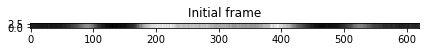

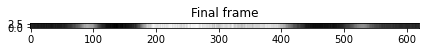

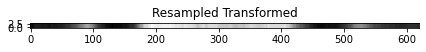

In [120]:
myshow(fixedimage_index, 'Initial frame')
myshow(movingimage_index, 'Final frame')
resampled = resample(movingimage_index, tx)
myshow(resampled, 'Resampled Transformed')

In [121]:
channels_selection=['red','green']

In [122]:
Ntime

375

In [ ]:
windowsize=10

deformations={}
correctedimage={}
deformationimage={}



for channel in channels_selection :
    
    print(channel)
    
    deformations[channel]={}

    for label in ranges :
        deformations[channel][label]=[]

    for label in ranges :
            deformations[channel][label].append(0.)
            
    # the reference template will be an average of windowsize frames

    correctedimage[channel]=np.zeros((Nx-2*margin,Ntime))
    deformationimage[channel]=np.zeros((Nx-2*margin,Ntime))

    # template from first image
    image2D=np.array([correctedtranslationcrop[channel][:,0] for line in range(0,nrows)]).astype('float32')
    fixedimage= sitk.GetImageFromArray(image2D)
    correctedimage[channel][:,0]=sitk.GetArrayFromImage(fixedimage)[0,:]


    for i in range(1,Ntime) :
        if (i%10)==0:
            print('process '+ channel +' channel, %.1f pc '%(i/Ntime*100))
        image2D=np.array([correctedtranslationcrop[channel][:,i] for line in range(0,nrows)]).astype('float32')
        movingimage= sitk.GetImageFromArray(image2D)

        outTx = multiscale_demons(registration_algorithm=demons_filter, 
                           fixed_image = fixedimage, 
                           moving_image = movingimage,
                           shrink_factors = [2],
                           smoothing_sigmas = [8,4])

        resampled = resample(movingimage, outTx)

        correctedimage[channel][:,i]=sitk.GetArrayFromImage(resampled).mean(axis=0)


        U,V=get_deformation(fixedimage, outTx)

        for label in ranges :
            deformations[channel][label].append(U[0,np.array(ranges[label])-margin].mean())

        deformationimage[channel][:,i]=U.mean(axis=0)

        #templateimage=correctedimage[:,max(i-windowsize,0):i].mean(axis=1).astype('float32') 
        i0=max(i-100,0)
        i0=0
        templateimage=correctedimage[channel][:,i0:i0+min(windowsize,i)].mean(axis=1).astype('float32')
        image2Dtemplate=np.array([templateimage for line in range(0,nrows)]).astype('float32')

        fixedimage=sitk.GetImageFromArray(image2Dtemplate)

red
process red channel, 2.7 pc 
process red channel, 5.3 pc 
process red channel, 8.0 pc 
process red channel, 10.7 pc 
process red channel, 13.3 pc 
process red channel, 16.0 pc 
process red channel, 18.7 pc 
process red channel, 21.3 pc 
process red channel, 24.0 pc 
process red channel, 26.7 pc 
process red channel, 29.3 pc 
process red channel, 32.0 pc 
process red channel, 34.7 pc 
process red channel, 37.3 pc 
process red channel, 40.0 pc 
process red channel, 42.7 pc 
process red channel, 45.3 pc 
process red channel, 48.0 pc 
process red channel, 50.7 pc 
process red channel, 53.3 pc 
process red channel, 56.0 pc 
process red channel, 58.7 pc 
process red channel, 61.3 pc 
process red channel, 64.0 pc 
process red channel, 66.7 pc 
process red channel, 69.3 pc 
process red channel, 72.0 pc 
process red channel, 74.7 pc 
process red channel, 77.3 pc 
process red channel, 80.0 pc 
process red channel, 82.7 pc 
process red channel, 85.3 pc 
process red channel, 88.0 pc 
process r

In [ ]:
plt.figure(figsize=(16,8*len(channels_selection)))

for j,channel in enumerate(channels_selection) :    
    ax1=plt.subplot(len(channels_selection),2,1+j*len(channels_selection))
    ax2=plt.subplot(len(channels_selection),2,2+j*len(channels_selection))
    ax1.imshow(inputimage[channel],aspect=0.6)
    ax1.set_title('input image '+channel)
    ax2.imshow(correctedimage[channel],aspect=0.6)
    ax2.set_title('corrected image '+channel)
    
    #for label in ranges :
    #    ax2.plot([0,Ntime],[(np.array(ranges[label])[0]-margin),(np.array(ranges[label])[0]-margin)],'w')
    #    ax2.plot([0,Ntime],[(np.array(ranges[label])[-1]-margin),(np.array(ranges[label])[-1]-margin)],'w')

plt.savefig(outputfolder+'deformation_correction.png')
#for label in ranges :
#    plt.plot([0,Ntime],[np.array(ranges[label])[0]-margin,np.array(ranges[label])[0]-margin],'r')
#    plt.plot([0,Ntime],[np.array(ranges[label])[-1]-margin,np.array(ranges[label])[-1]-margin],'r')

In [ ]:
from matplotlib import cm as CM
from scipy import ndimage

for channel in channels_selection:

    # smooth deformations
    deformationimage_smooth=ndimage.gaussian_filter(deformationimage[channel], (0, 5))

    velocityimage=np.diff(deformationimage_smooth,axis=0)

    x_grid=np.arange(0,Ntime)*ts
    y_grid=np.arange(0,Nx-margin*2)*dx
    x_mesh,y_mesh=np.meshgrid(x_grid,y_grid)

    plt.figure(figsize=(8,8))
    plt.pcolormesh(x_mesh,y_mesh,velocityimage,cmap=CM.jet,vmin=-0.1,vmax=0.1)

    plt.colorbar()
    for label in ranges :
        plt.plot([0,Ntime*ts],[(np.array(ranges[label])[0]-margin)*dx,(np.array(ranges[label])[0]-margin)*dx],'w')
        plt.plot([0,Ntime*ts],[(np.array(ranges[label])[-1]-margin)*dx,(np.array(ranges[label])[-1]-margin)*dx],'w')

# Methods comparisons

In [ ]:
def extract_diameter(scanline,initialtraces,deformations) :
    
    cutoff=25
    
    bottom=np.array(initialtraces[scanline+'_bottom'])
    top=np.array(initialtraces[scanline+'_top'])


    diameter=bottom-top
    
    #diameter_th=lowpassfilter(diameter,fs,cutoff)
    top_th=savgol_filter(top,11,3)
    bottom_th=savgol_filter(bottom,11,3)
    
    bottom=np.array(deformations[scanline+'_bottom'])*dx+np.array(initialtraces[scanline+'_bottom'])[0]
    top=np.array(deformations[scanline+'_top'])*dx+np.array(initialtraces[scanline+'_top'])[0]


    diameter=bottom-top
    
    #diameter_reg=lowpassfilter(diameter,fs,cutoff)
    top_reg=savgol_filter(top,11,3)
    bottom_reg=savgol_filter(bottom,11,3)

    
    return (top_th,bottom_th,top_reg,bottom_reg)

In [ ]:
# Localisation of the markers in the initial frame
deltax=5
shift=2

ranges={}
upper={}
lower={}

upper['endfoot_bottom']=shift+60
lower['endfoot_bottom']=shift

upper['endfoot_top']=0
lower['endfoot_top']=-60

upper['lumen_bottom']=shift+40-20
lower['lumen_bottom']=shift-10-20

upper['lumen_top']=0+10
lower['lumen_top']=-40

for label in initialtraces :
    ranges[label]=range(round(np.array(initialtraces[label])[0]/dx)+lower[label],round(np.array(initialtraces[label])[0]/dx)+upper[label])

In [ ]:
plt.figure(figsize=(16,8))

plt.imshow(correctedimage['red']+1.8*correctedimage['green'],aspect=0.6)
plt.title('corrected image '+channel)
    
for label in ranges :
    plt.plot([0,Ntime],[(np.array(ranges[label])[0]-margin),(np.array(ranges[label])[0]-margin)],'w')
    plt.plot([0,Ntime],[(np.array(ranges[label])[-1]-margin),(np.array(ranges[label])[-1]-margin)],'w')
    
plt.savefig(outputfolder+'ROI.png')

In [ ]:
for channel in channels_selection :
    for label in ranges :
        deformations[channel][label]=deformationimage[channel][np.array(ranges[label])-margin].mean(axis=0)

In [ ]:
channellumen='red'
channelendfoot='green'

endfoot_top_th,endfoot_bottom_th,endfoot_top_reg,endfoot_bottom_reg=extract_diameter('endfoot',initialtraces,deformations[channelendfoot])
endfoot_th=-(endfoot_top_th-endfoot_bottom_th)
endfoot_reg=-(endfoot_top_reg-endfoot_bottom_reg)

lumen_top_th,lumen_bottom_th,lumen_top_reg,lumen_bottom_reg=extract_diameter('lumen',initialtraces,deformations[channellumen])
lumen_th=-(lumen_top_th-lumen_bottom_th)
lumen_reg=-(lumen_top_reg-lumen_bottom_reg)

pvs_top_th=lumen_top_th-endfoot_top_th
pvs_top_reg=lumen_top_reg-endfoot_top_reg

pvs_bottom_th=-(lumen_bottom_th-endfoot_bottom_th)
pvs_bottom_reg=-(lumen_bottom_reg-endfoot_bottom_reg)

pvs_th=endfoot_th-lumen_th
pvs_reg=endfoot_reg-lumen_reg              


plt.figure()
plt.plot(np.arange(Ntime)*ts,endfoot_th,':',label='threshold',linewidth=1)
plt.plot(np.arange(Ntime)*ts,endfoot_reg,label='registration',linewidth=1)
plt.title('Diameter of endfoot')
plt.legend()
plt.savefig(outputfolder+'endfoot.png')

plt.figure()
plt.plot(np.arange(Ntime)*ts,lumen_th,':',label='threshold',linewidth=1)
plt.plot(np.arange(Ntime)*ts,lumen_reg,label='registration',linewidth=1)
plt.title('Diameter of lumen')
plt.legend()
plt.savefig(outputfolder+'lumen.png')



plt.figure()
plt.plot(np.arange(Ntime)*ts,pvs_top_th,':',label='threshold top',linewidth=1)
plt.plot(np.arange(Ntime)*ts,pvs_top_reg,label='registration top',linewidth=1)

plt.plot(np.arange(Ntime)*ts,pvs_bottom_th,':',label='threshold bottom',linewidth=1)
plt.plot(np.arange(Ntime)*ts,pvs_bottom_reg,label='registration bottom',linewidth=1)

plt.plot(np.arange(Ntime)*ts,pvs_th/2,':',label='threshold total/2',linewidth=1)
plt.plot(np.arange(Ntime)*ts,pvs_reg/2,label='registration total/2',linewidth=1)

plt.title('Thickness of PVS ')
plt.legend()
plt.savefig(outputfolder+'PVSthickness.png')

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(image2DRGB/300,aspect=0.5)


plt.plot(np.arange(Ntime),(lumen_top_reg)/dx +savgol_filter(spantranslation[channellumen],11,3),label=label,linewidth=3,c='w')
plt.plot(np.arange(Ntime),(lumen_bottom_reg)/dx +savgol_filter(spantranslation[channellumen],11,3),label=label,linewidth=3,c='w')

plt.plot(np.arange(Ntime),(endfoot_top_reg)/dx +savgol_filter(spantranslation[channelendfoot],11,3),label=label,linewidth=3,c='w')
plt.plot(np.arange(Ntime),(endfoot_bottom_reg)/dx +savgol_filter(spantranslation[channelendfoot],11,3),label=label,linewidth=3,c='w')


plt.title(Files[mouse]['name']+' t='+str(tini))
plt.savefig(outputfolder+'registration_traces.png')

In [ ]:
signal=lumen_reg/2
#signal_filtered=savgol_filter(signal,11,3)
signal_filtered=highpassfilter(signal,fs,5)
ampl_lumen,period_lumen,tvalley_lumen,tpeak_lumen,mean_lumen=da.amp_analysis(signal,signal_filtered,np.arange(Ntime)*ts,5, 15, view=False)

signal=lumen_th/2
#signal_filtered=savgol_filter(signal,11,3)
signal_filtered=highpassfilter(signal,fs,5)
ampl_lumenth,period_lumenth,tvalley_lumenth,tpeak_lumenth,mean_lumenth=da.amp_analysis(signal,signal_filtered,np.arange(Ntime)*ts,5, 15, view=False)

plt.hist(ampl_lumenth/mean_lumenth,label='threshold',alpha=0.5)

plt.hist(ampl_lumen/mean_lumen,label='registration',alpha=0.5)
plt.title('lumen ampl/mean histogram')
plt.legend()

plt.savefig(outputfolder+'histogram_ampl_lumen.png')


In [ ]:
signal=endfoot_reg/2
#signal_filtered=savgol_filter(signal,11,3)
signal_filtered=highpassfilter(signal,fs,5)
ampl_endfoot,period_endfoot,tvalley_endfoot,tpeak_endfoot,mean_endfoot=da.amp_analysis(signal,signal_filtered,np.arange(Ntime)*ts,5, 15, view=False)


signal=endfoot_th/2
#signal_filtered=savgol_filter(signal,11,3)
signal_filtered=highpassfilter(signal,fs,5)
ampl_endfootth,period_endfootth,tvalley_endfootth,tpeak_endfootth,mean_endfootth=da.amp_analysis(signal,signal_filtered,np.arange(Ntime)*ts,5, 15, view=False)

plt.hist(ampl_endfootth/mean_endfootth,label='threshold',alpha=0.5)
plt.hist(ampl_endfoot/mean_endfoot,label='registration',alpha=0.5)
plt.title('endfoot ampl/mean histogram')
plt.legend()

plt.savefig(outputfolder+'histogram_ampl_endfoot.png')

In [ ]:
signal=pvs_reg
#signal_filtered=savgol_filter(signal,11,3)
signal_filtered=highpassfilter(signal,fs,5)
ampl_pvs,period_pvs,tvalley_pvs,tpeak_pvs,mean_pvs=da.amp_analysis(signal,signal_filtered,np.arange(Ntime)*ts,5, 15, view=False)

signal=pvs_th
#signal_filtered=savgol_filter(signal,11,3)
signal_filtered=highpassfilter(signal,fs,5)
ampl_pvsth,period_pvsth,tvalley_pvsth,tpeak_pvsth,mean_pvsth=da.amp_analysis(signal,signal_filtered,np.arange(Ntime)*ts,5, 15, view=False)

plt.hist(ampl_pvsth/mean_pvsth,label='threshold',alpha=0.5)

plt.hist(ampl_pvs/mean_pvs,label='registration',alpha=0.5)
#plt.xlim([0,0.2])
plt.title('PVS full /2  ampl/mean histogram')
plt.legend()

plt.savefig(outputfolder+'histogram_ampl_PVS.png')

In [ ]:
signal=pvs_top_reg
#signal_filtered=savgol_filter(signal,11,3)
signal_filtered=highpassfilter(signal,fs,5)
ampl_top,period_top,tvalley_top,tpeak_top,mean_top=da.amp_analysis(signal,signal_filtered,np.arange(Ntime)*ts,5, 15, view=False)

signal=pvs_top_th
#signal_filtered=savgol_filter(signal,11,3)
signal_filtered=highpassfilter(signal,fs,5)
ampl_topth,period_topth,tvalley_topth,tpeak_topth,mean_topth=da.amp_analysis(signal,signal_filtered,np.arange(Ntime)*ts,5, 15, view=False)

plt.hist(ampl_topth/mean_topth,label='threshold',alpha=0.5)

plt.hist(ampl_top/mean_top,label='registration',alpha=0.5)
#plt.xlim([0,0.2])
plt.title('PVS2 ampl/mean histogram')
plt.legend()

plt.savefig(outputfolder+'histogram_ampl_PVS2.png')

In [ ]:
signal=pvs_bottom_reg
#signal_filtered=savgol_filter(signal,11,3)
signal_filtered=highpassfilter(signal,fs,5)
ampl_bottom,period_bottom,tvalley_bottom,tpeak_bottom,mean_bottom=da.amp_analysis(signal,signal_filtered,np.arange(Ntime)*ts,5, 15, view=False)

signal=pvs_bottom_th
#signal_filtered=savgol_filter(signal,11,3)
signal_filtered=highpassfilter(signal,fs,5)
ampl_bottomth,period_bottomth,tvalley_bottomth,tpeak_bottomth,mean_bottomth=da.amp_analysis(signal,signal_filtered,np.arange(Ntime)*ts,5, 15, view=False)

plt.hist(ampl_bottomth/mean_bottomth,label='threshold',alpha=0.5)
plt.hist(ampl_bottom/mean_bottom,label='registration',alpha=0.5)
 
plt.title('PVS1 ampl/mean histogram')
plt.legend()

plt.savefig(outputfolder+'histogram_ampl_PVS1.png')

In [ ]:
for label in ['lumen_bottom','lumen_top'] :
    plt.plot(np.arange(len(deformations[channellumen][label]))*ts,savgol_filter(np.array(deformations[channellumen][label])*dx,15,3),label=label)
    

for label in ['endfoot_bottom','endfoot_top'] :
    plt.plot(np.arange(len(deformations[channelendfoot][label]))*ts,savgol_filter(np.array(deformations[channelendfoot][label])*dx,15,3),label=label)
    
plt.legend()
plt.xlabel('deformation (um)')
plt.xlabel('time (s)')
plt.ylabel('deformation from first image (um)')

plt.savefig(outputfolder+'deformations.png')

In [ ]:
from scipy.stats import pearsonr

trace1=highpassfilter(lumen_bottom_reg,fs,5)+savgol_filter(spantranslation[channel],11,3)*dx
trace2=highpassfilter(endfoot_bottom_reg,fs,5)+savgol_filter(spantranslation[channel],11,3)*dx

corrpvs_bottom_reg,_=pearsonr(trace1,trace2)

trace1=highpassfilter(lumen_top_reg,fs,5)+savgol_filter(spantranslation[channel],11,3)*dx
trace2=highpassfilter(endfoot_top_reg,fs,5)+savgol_filter(spantranslation[channel],11,3)*dx

corrpvs_top_reg,_=pearsonr(trace1,trace2)


trace1=highpassfilter(lumen_top_reg,fs,5)+savgol_filter(spantranslation[channel],11,3)*dx
trace2=highpassfilter(lumen_bottom_reg,fs,5)+savgol_filter(spantranslation[channel],11,3)*dx

corr_lumen_reg,_=pearsonr(trace1,trace2)

trace1=highpassfilter(endfoot_top_reg,fs,5)+savgol_filter(spantranslation[channel],11,3)*dx
trace2=highpassfilter(endfoot_bottom_reg,fs,5)+savgol_filter(spantranslation[channel],11,3)*dx

corr_endfoot_reg,_=pearsonr(trace1,trace2)



In [ ]:
trace1=highpassfilter(lumen_bottom_th,fs,5)
trace2=highpassfilter(endfoot_bottom_th,fs,5)

corrpvs_bottom_th,_=pearsonr(trace1,trace2)

trace1=highpassfilter(lumen_top_th,fs,5)
trace2=highpassfilter(endfoot_top_th,fs,5)

corrpvs_top_th,_=pearsonr(trace1,trace2)


trace1=highpassfilter(lumen_top_th,fs,5)
trace2=highpassfilter(lumen_bottom_th,fs,5)

corr_lumen_th,_=pearsonr(trace1,trace2)

trace1=highpassfilter(endfoot_top_th,fs,5)
trace2=highpassfilter(endfoot_bottom_th,fs,5)

corr_endfoot_th,_=pearsonr(trace1,trace2)

In [ ]:
toprint=[]

toprint.append(Files[mouse]['name'])
toprint.append(tini)
toprint.append(timewindow)

l=(mean_lumen.mean(),mean_lumen.std(),ampl_lumen.mean(),ampl_lumen.std(),ampl_lumen.mean()/mean_lumen.mean(),corr_lumen_reg)
[toprint.append(element) for element in l]
print('mean lumen reg, std lumen reg, amp lumen reg, std lumen reg, ratio mean reg, corr reg')
print('%e, %e, %e, %e, %e,  %.2f'%l)

l=(mean_endfoot.mean(),mean_endfoot.std(),ampl_endfoot.mean(),ampl_endfoot.std(),ampl_endfoot.mean()/mean_endfoot.mean(),corr_endfoot_reg)
[toprint.append(element) for element in l]

print('mean endfoot reg, std endfoot reg, amp endfoot reg, std endfoot reg , ratio mean reg, corr reg')
print('%e, %e, %e, %e, %e,  %.2f'%l)

l=(mean_pvs.mean(),mean_pvs.std(),ampl_pvs.mean(),ampl_pvs.std(),ampl_pvs.mean()/mean_pvs.mean(),min(corr_endfoot_reg,corr_lumen_reg))
[toprint.append(element) for element in l]
print('mean PVS reg, std PVS reg, amp PVS reg, std PVS reg, ratio mean reg, corr reg')
print('%e, %e, %e, %e, %e,  %.2f'%l)

l=(mean_bottom.mean(),mean_bottom.std(),ampl_bottom.mean(),ampl_bottom.std(),ampl_bottom.mean()/mean_bottom.mean(),corrpvs_bottom_reg)
[toprint.append(element) for element in l]
print('mean PVS1 reg, std PVS1 reg, amp PVS1 reg, std PVS1 reg, ratio mean reg, corr reg')
print('%e, %e, %e, %e, %e,  %.2f'%l)
      
      
l=(mean_top.mean(),mean_top.std(),ampl_top.mean(),ampl_top.std(),ampl_top.mean()/mean_top.mean(),corrpvs_top_reg)
[toprint.append(element) for element in l]

print('mean PVS2 reg, std PVS2 reg, amp PVS2 reg, std PVS2 reg, ratio mean reg, corr reg')
print('%e, %e, %e, %e, %e,  %.2f'%l)

l=(ampl.mean(),ampl.std(),(np.max(spantranslation['mixed'])*dx-np.min(spantranslation['mixed'])*dx))
[toprint.append(element) for element in l]
print(' amp card rigid, std rigid, max rigid')
print('%e, %e, %e'%l)

In [ ]:
l=(mean_lumenth.mean(),mean_lumenth.std(),ampl_lumenth.mean(),ampl_lumenth.std(),ampl_lumenth.mean()/mean_lumenth.mean(),corr_lumen_th)
[toprint.append(element) for element in l]
print('mean lumen th, std lumen th, amp lumen th, std lumen th, ratio mean th, corr th')
print('%e, %e, %e, %e, %e, %.2f'%l)

l=(mean_endfootth.mean(),mean_endfootth.std(),ampl_endfootth.mean(),ampl_endfootth.std(),ampl_endfootth.mean()/mean_endfootth.mean(),corr_endfoot_th)
[toprint.append(element) for element in l]

print('mean endfoot th, std endfoot th, amp endfoot th, std endfoot th , ratio mean th, corr th')
print('%e, %e, %e, %e, %e, %.2f'%l)

l=(mean_pvsth.mean(),mean_pvsth.std(),ampl_pvsth.mean(),ampl_pvsth.std(),ampl_pvsth.mean()/mean_pvsth.mean(),min(corr_lumen_th,corr_endfoot_th))
[toprint.append(element) for element in l]
print('mean PVS th, std PVS th, amp PVS th, std PVS th, ratio mean th, corr th')
print('%e, %e, %e, %e, %e, %.2f'%l)

l=(mean_bottomth.mean(),mean_bottomth.std(),ampl_bottomth.mean(),ampl_bottomth.std(),ampl_bottomth.mean()/mean_bottomth.mean(),corrpvs_bottom_th)
[toprint.append(element) for element in l]
print('mean PVS1 th, std PVS1 th, amp PVS1 th, std PVS1 th, ratio mean th, corr th')
print('%e, %e, %e, %e, %e, %.2f'%l)
      
      
l=(mean_topth.mean(),mean_topth.std(),ampl_topth.mean(),ampl_topth.std(),ampl_topth.mean()/mean_topth.mean(),corrpvs_top_th)
[toprint.append(element) for element in l]

print('mean PVS2 th, std PVS2 th, amp PVS2 th, std PVS2 th, ratio mean th, corr th')
print('%e, %e, %e, %e, %e, %.2f'%l)


In [ ]:
file='results.csv'
import csv   

with open(file, 'a') as f:
    writer = csv.writer(f)
    writer.writerow(toprint+tobeprinted_rigid)